In [1]:
import numpy as npy
from math import pi as pi
import RefractiveIndex as ri
import matplotlib.pyplot as plt
import opticalCrossSection as ocs

In [2]:
x = npy.linspace(0,100,101)

In [3]:
sigma = 5                                          # desvio padrão
mu_d = 60                                            # média
mu_t = 10

In [4]:
def normal_dist(x,sigma,mu):
    return npy.exp(-0.5*((x-mu)/sigma)**2)/(sigma*npy.sqrt(2*pi))

In [5]:
f = normal_dist(x,sigma,mu_d)
g = normal_dist(x,sigma/2,mu_t)

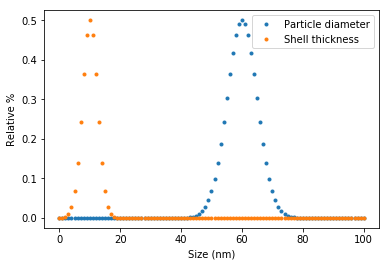

In [6]:
fig1 = plt.figure(1)
ax1 = plt.gca()
lines1 = plt.plot(x,0.5*f/npy.amax(f),'.',x,0.5*g/npy.amax(g),'.')
plt.legend(lines1[:2], ['Particle diameter','Shell thickness','Absorption','Backscattering']);
plt.ylabel('Relative %')
plt.xlabel('Size (nm)')
plt.show()

In [7]:
L = 2e-3
Cnp = 1e16
thick = npy.linspace(1,20,21)
radii = npy.linspace(40,80,21)
absorbance = npy.zeros(299)

In [8]:
for xx in range(0,len(radii)-1,1):
    for yy in range(0,len(thick)-1,1):
        wl, N, N1, N2, mu1, mu2 = ri.setupRI('Au','Air','Water',radii[xx],radii[xx]+thick[yy],450,1050,True,False)
        Csca, Cext, Cabs, Cbck = ocs.shellCS(wl*(1e9),N1,N2,N,mu1,mu2,radii[xx],radii[xx]+thick[yy])
        wl = npy.delete(wl,len(wl)-1)
        Cext = npy.delete(Cext,len(Cext)-1)
        for zz in range(0,len(wl)-1,1):
            alpha = Cnp*Cext[zz]*(1e-18)
            absorbance[zz] += npy.log10(1/npy.exp(-alpha*L))

KeyboardInterrupt: 

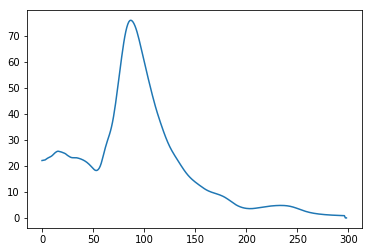

In [9]:
plt.plot(absorbance)